In [1]:
#MULTIPLE LINEAR REGRESSION MODEL FOR WEIGHT ESTIMATION FROM MEASUREMENTS OF THE FISH

#The aim of this case study is to estimate weight of the fish individuals from their measurements
#through using linear regression model.
#This study can be improved to use in fish farms. Individual fish swimming in front of the camera can
#be measured from the video image and the weight of the fish can be estimated through the linear
#regression model.

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data = pd.read_csv(r"C:\zubeda\PGA02_Zubu\Machine Learning Models\LinearRegression\Fish_dataset.csv")
df = data.copy()
df.sample(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
98,Perch,188.0,22.6,24.6,26.2,6.7334,4.1658
144,Pike,1650.0,59.0,63.4,68.0,10.8120,7.4800
134,Pike,456.0,40.0,42.5,45.5,7.2800,4.3225
63,Parkki,90.0,16.3,17.7,19.8,7.4052,2.6730
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
59,Whitefish,800.0,33.7,36.4,39.6,11.7612,6.5736
95,Perch,170.0,21.5,23.5,25.0,6.2750,3.7250
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
122,Perch,820.0,37.1,40.0,42.5,11.1350,6.6300
114,Perch,700.0,34.5,37.0,39.4,10.8350,6.2646


In [4]:
df.rename(columns= {'Length1':'LengthVer', 'Length2':'LengthDia', 'Length3':'LengthCro'}, inplace=True)
df.head()

,Species,Weight,LengthVer,LengthDia,LengthCro,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
sp = df['Species'].value_counts()
sp = pd.DataFrame(sp)
sp.T

,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Species,56,35,20,17,14,11,6


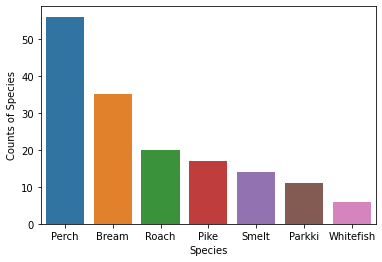

In [6]:
# 1.Plot a bar chart showing count of individual species
sns.barplot(x=sp.index, y=sp['Species']);
plt.xlabel('Species')
plt.ylabel('Counts of Species')
plt.show()

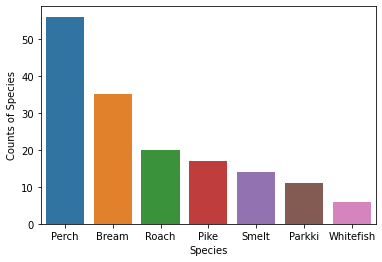

In [7]:
sp = df['Species'].value_counts()
sp = pd.DataFrame(sp)
sns.barplot(x=sp.index, y=sp['Species']);
plt.xlabel('Species')
plt.ylabel('Counts of Species')
plt.show()

<AxesSubplot:xlabel='Weight'>

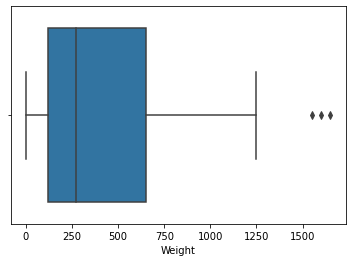

In [8]:
# 2.Identify outliers and remove if any

sns.boxplot(x=df['Weight'])

In [9]:
dfw = df['Weight']
dfw_Q1 = dfw.quantile(0.25)
dfw_Q3 = dfw.quantile(0.75)
dfw_IQR = dfw_Q3 - dfw_Q1
dfw_lowerend = dfw_Q1 - (1.5 * dfw_IQR)
dfw_upperend = dfw_Q3 + (1.5 * dfw_IQR)

In [10]:
dfw_outliers = dfw[(dfw < dfw_lowerend) | (dfw > dfw_upperend)]
dfw_outliers

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

<AxesSubplot:xlabel='LengthVer'>

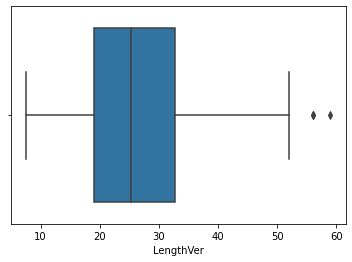

In [11]:
sns.boxplot(x=df['LengthVer'])

In [12]:
dflv = df['LengthVer']
dflv_Q1 = dflv.quantile(0.25)
dflv_Q3 = dflv.quantile(0.75)
dflv_IQR = dflv_Q3 - dflv_Q1
dflv_lowerend = dflv_Q1 - (1.5 * dflv_IQR)
dflv_upperend = dflv_Q3 + (1.5 * dflv_IQR)

dflv_outliers = dflv[(dflv < dflv_lowerend) | (dflv > dflv_upperend)]
dflv_outliers

142    56.0
143    56.0
144    59.0
Name: LengthVer, dtype: float64

<AxesSubplot:xlabel='LengthDia'>

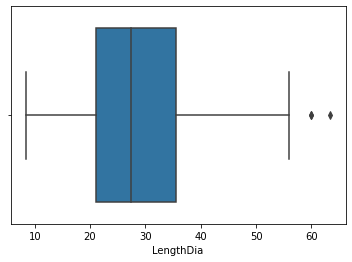

In [13]:
sns.boxplot(x=df['LengthDia'])

In [14]:
dfdia = df['LengthDia']
dfdia_Q1 = dfdia.quantile(0.25)
dfdia_Q3 = dfdia.quantile(0.75)
dfdia_IQR = dfdia_Q3 - dfdia_Q1
dfdia_lowerend = dfdia_Q1 - (1.5 * dfdia_IQR)
dfdia_upperend = dfdia_Q3 + (1.5 * dfdia_IQR)

dfdia_outliers = dfdia[(dfdia < dfdia_lowerend) | (dfdia > dfdia_upperend)]
dfdia_outliers

142    60.0
143    60.0
144    63.4
Name: LengthDia, dtype: float64

<AxesSubplot:xlabel='LengthCro'>

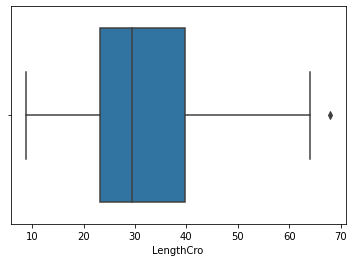

In [15]:
sns.boxplot(x=df['LengthCro'])

In [16]:
dfcro = df['LengthCro']
dfcro_Q1 = dfcro.quantile(0.25)
dfcro_Q3 = dfcro.quantile(0.75)
dfcro_IQR = dfcro_Q3 - dfcro_Q1
dfcro_lowerend = dfcro_Q1 - (1.5 * dfcro_IQR)
dfcro_upperend = dfcro_Q3 + (1.5 * dfcro_IQR)

dfcro_outliers = dfcro[(dfcro < dfcro_lowerend) | (dfcro > dfcro_upperend)]
dfcro_outliers

144    68.0
Name: LengthCro, dtype: float64

In [17]:
df1 = df.drop([142, 143, 144])
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,156.0,375.217308,319.546978,0.0000,120.000000,271.0000,612.500000,1250.000
LengthVer,156.0,25.655769,9.119630,7.5000,19.000000,25.0000,32.125000,52.000
LengthDia,156.0,27.786538,9.792651,8.4000,21.000000,26.7500,35.000000,56.000
LengthCro,156.0,30.571154,10.695359,8.8000,23.025000,29.2500,39.425000,59.700
Height,156.0,8.951128,4.324325,1.7284,5.931675,7.6478,12.378550,18.957
Width,156.0,4.375719,1.672188,1.0476,3.369600,4.2433,5.424375,8.142


<AxesSubplot:xlabel='LengthCro'>

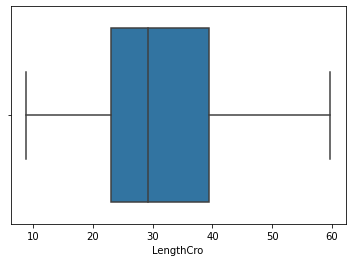

In [19]:
sns.boxplot(x=df1['LengthCro'])

In [20]:
# 3.Build a regression model and print regression equation

# Dependant (Target) Variable:
y = df1['Weight']
# Independant Variables:
X = df1.iloc[:,2:7]  #Species is avoided because its categorical and does not have much significance

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print('How many samples do we have in our test and train datasets?')
print('X_train: ', np.shape(X_train))
print('y_train: ', np.shape(y_train))
print('X_test: ', np.shape(X_test))
print('y_test: ', np.shape(y_test))

How many samples do we have in our test and train datasets?
X_train:  (124, 5)
y_train:  (124,)
X_test:  (32, 5)
y_test:  (32,)


In [22]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [23]:
# My model's parameters
print('Model intercept: ', reg.intercept_)
print('Model coefficients: ', reg.coef_)

Model intercept:  -441.0088725388175
Model coefficients:  [ 89.93843031 -32.68619524 -37.53063323  33.07275974  60.72005923]


In [24]:
print('y = ' + str('%.2f' % reg.intercept_) + ' + ' + str('%.2f' % reg.coef_[0]) + '*X1 ' + str('%.2f' % reg.coef_[1]) + ' + ' + '*X2 ' +
      str('%.2f' % reg.coef_[2]) + '*X3 + ' + str('%.2f' % reg.coef_[3]) + '*X4 + ' + str('%.2f' % reg.coef_[4]) + '*X5')

y = -441.01 + 89.94*X1 -32.69*X2 -37.53*X3 + 33.07*X4 + 60.72*X5


In [25]:
# 4.What is the mean score of the model at 95% confidence interval?

y_pred = reg.predict(X_test)

In [26]:
from sklearn.model_selection import cross_val_score
cross_val_score_train = cross_val_score(reg, X_train, y_train, cv=5, scoring='r2')
print(cross_val_score_train)

[0.89119112 0.93859621 0.92572295 0.88550794 0.83504798]


In [27]:
cross_val_score_train.mean()

0.8952132388952405

In [ ]:
# 5.Compare real and predicted weights and give a conclusion statement based on it?